[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/12_1_Back_to_Bayesics.ipynb)

Install Bambi for this session

In [48]:
!pip install bambi

Load required packages and download the data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import bambi as bmb
import arviz as az
from sklearn.preprocessing import PolynomialFeatures


nba = pd.read_csv("https://richardson.byu.edu/220/nba.csv")
nba["TS%"] = nba["TS%"]*100
nba["3PAr"] = nba["3PAr"]*100
nba["FTr"] = nba["FTr"]*100
nba = nba.drop(columns = ["Player","Age","Tm","G","MP","USG%"])
nba

,Pos,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,BPM
0,C,60.4,0.6,42.1,14.0,24.0,13.2,1.5,3.4,14.2,2.9
1,PF,59.8,1.8,48.4,8.5,24.9,24.2,1.7,3.8,17.6,3.4
2,C,57.1,19.8,24.1,6.3,17.8,11.4,1.0,4.4,7.8,1.4
3,SG,60.9,56.2,17.9,1.2,11.1,10.0,0.7,0.2,10.9,-1.3
4,C,66.4,1.3,58.1,12.3,24.9,8.9,1.0,4.2,11.7,2.3
...,...,...,...,...,...,...,...,...,...,...,...
327,SG,55.4,30.9,24.3,4.7,13.8,21.0,2.6,1.2,13.8,1.9
328,PF,52.1,36.9,12.0,6.2,16.1,11.3,2.8,1.4,13.9,-1.2
329,PG,59.5,45.5,44.8,1.6,11.5,45.6,1.4,0.3,16.2,3.9
330,C,57.6,15.7,37.4,12.6,21.2,11.3,1.5,1.7,11.9,-0.6


We want to fit a Bayes linear regression model using all the variables. How would we do that without manually typing out each variable. This is a function that can perform this task.

In [51]:

def create_bambi_formula(df, response_var):
    # Get all column names excluding the response variable
    predictors = df.columns[df.columns != response_var]

    # Handle special characters in column names (e.g., spaces, %, etc.)
    predictors = [f"`{col}`" if not col.isidentifier() else col for col in predictors]

    # Join all predictors into a formula string
    formula = f"{response_var} ~ " + " + ".join(predictors)
    return formula

formula = create_bambi_formula(nba, 'BPM')
print(formula)


BPM ~ Pos + `TS%` + `3PAr` + FTr + `ORB%` + `DRB%` + `AST%` + `STL%` + `BLK%` + `TOV%`


The formula can be used in the Bayesian model.

In [52]:
model = bmb.Model(formula, nba)
#model = bmb.Model('BPM ~  Pos + FTr + `TS%` + `3PAr` + `ORB%` +  `DRB%` + `AST%` + `BLK%` + `STL%` + `TOV%`',nba)

results = model.fit(draws=200, chains=2)
az.summary(results)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-22.860,0.968,-24.764,-21.106,0.042,0.030,517.0,248.0,1.01
Pos[PF],0.691,0.237,0.281,1.157,0.013,0.009,333.0,331.0,1.00
Pos[PF-C],0.336,0.765,-1.076,1.712,0.029,0.031,702.0,402.0,1.00
Pos[PG],-0.298,0.349,-0.973,0.346,0.023,0.016,228.0,224.0,1.01
Pos[SF],0.778,0.302,0.232,1.308,0.016,0.012,351.0,290.0,1.00
Pos[SF-PF],2.230,1.105,0.194,4.069,0.040,0.033,744.0,411.0,1.00
Pos[SF-SG],0.523,0.791,-0.903,1.963,0.033,0.032,600.0,312.0,1.01
Pos[SG],0.584,0.315,0.037,1.191,0.017,0.014,337.0,233.0,1.02
TS%,0.288,0.014,0.259,0.313,0.001,0.000,546.0,261.0,1.01
3PAr,0.030,0.005,0.021,0.039,0.000,0.000,470.0,350.0,1.02


Let's add higher order terms!!

In [ ]:
# Split predictors into continuous and categorical
continuous_cols = ['TS%', '3PAr', 'FTr','ORB%','DRB%','AST%','STL%','BLK%','TOV%'] # Add other continuous columns
categorical_cols = ['Pos']

# Separate the DataFrame into continuous and categorical DataFrames
X_continuous = nba[continuous_cols]
X_categorical = nba[categorical_cols]

# Apply Polynomial Transformation to continuous variables
# Note that this adds the needed columns for adding an intercept to the model
poly = PolynomialFeatures(2,include_bias=False)
X_continuous_transformed = poly.fit_transform(X_continuous)
hot_names = poly.get_feature_names_out(X_continuous.columns)
X_cont_poly = pd.DataFrame(X_continuous_transformed,columns = hot_names)

# Convert categorical variables to dummies
X_categorical_dummies = pd.get_dummies(X_categorical, drop_first=True)

X_full = pd.concat([X_cont_poly,X_categorical_dummies],axis = 1)

for continuous_col in continuous_cols:
    for dummy_col in X_categorical_dummies:
        interaction_term_name = f"{continuous_col}_x_{dummy_col}"
        X_full[interaction_term_name] = X_full[continuous_col] * X_full[dummy_col]

print(X_full)

      TS%  3PAr   FTr  ORB%  DRB%  AST%  STL%  BLK%  TOV%    TS%^2  ...  \
0    60.4   0.6  42.1  14.0  24.0  13.2   1.5   3.4  14.2  3648.16  ...   
1    59.8   1.8  48.4   8.5  24.9  24.2   1.7   3.8  17.6  3576.04  ...   
2    57.1  19.8  24.1   6.3  17.8  11.4   1.0   4.4   7.8  3260.41  ...   
3    60.9  56.2  17.9   1.2  11.1  10.0   0.7   0.2  10.9  3708.81  ...   
4    66.4   1.3  58.1  12.3  24.9   8.9   1.0   4.2  11.7  4408.96  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...      ...  ...   
327  55.4  30.9  24.3   4.7  13.8  21.0   2.6   1.2  13.8  3069.16  ...   
328  52.1  36.9  12.0   6.2  16.1  11.3   2.8   1.4  13.9  2714.41  ...   
329  59.5  45.5  44.8   1.6  11.5  45.6   1.4   0.3  16.2  3540.25  ...   
330  57.6  15.7  37.4  12.6  21.2  11.3   1.5   1.7  11.9  3317.76  ...   
331  65.1   0.5  43.1  15.9  26.4   9.1   0.6   4.4  11.8  4238.01  ...   

     BLK%_x_Pos_SF-PF  BLK%_x_Pos_SF-SG  BLK%_x_Pos_SG  TOV%_x_Pos_PF  \
0                 0.0     

In [53]:
formula = create_bambi_formula(X_full, 'BPM')
print(formula)

BPM ~ `TS%` + `3PAr` + FTr + `ORB%` + `DRB%` + `AST%` + `STL%` + `BLK%` + `TOV%` + `TS%^2` + `TS% 3PAr` + `TS% FTr` + `TS% ORB%` + `TS% DRB%` + `TS% AST%` + `TS% STL%` + `TS% BLK%` + `TS% TOV%` + `3PAr^2` + `3PAr FTr` + `3PAr ORB%` + `3PAr DRB%` + `3PAr AST%` + `3PAr STL%` + `3PAr BLK%` + `3PAr TOV%` + `FTr^2` + `FTr ORB%` + `FTr DRB%` + `FTr AST%` + `FTr STL%` + `FTr BLK%` + `FTr TOV%` + `ORB%^2` + `ORB% DRB%` + `ORB% AST%` + `ORB% STL%` + `ORB% BLK%` + `ORB% TOV%` + `DRB%^2` + `DRB% AST%` + `DRB% STL%` + `DRB% BLK%` + `DRB% TOV%` + `AST%^2` + `AST% STL%` + `AST% BLK%` + `AST% TOV%` + `STL%^2` + `STL% BLK%` + `STL% TOV%` + `BLK%^2` + `BLK% TOV%` + `TOV%^2` + Pos_PF + `Pos_PF-C` + Pos_PG + Pos_SF + `Pos_SF-PF` + `Pos_SF-SG` + Pos_SG + `TS%_x_Pos_PF` + `TS%_x_Pos_PF-C` + `TS%_x_Pos_PG` + `TS%_x_Pos_SF` + `TS%_x_Pos_SF-PF` + `TS%_x_Pos_SF-SG` + `TS%_x_Pos_SG` + `3PAr_x_Pos_PF` + `3PAr_x_Pos_PF-C` + `3PAr_x_Pos_PG` + `3PAr_x_Pos_SF` + `3PAr_x_Pos_SF-PF` + `3PAr_x_Pos_SF-SG` + `3PAr_x_Pos_

In [54]:
nba_full = pd.concat([nba[["BPM"]],X_full],axis = 1)

In [56]:
model = bmb.Model(formula, nba_full)
#results = model.fit(draws=200, chains=2)
#az.summary(results)

When you have a Bayesian model with many variables and you don't have time/resources/needs to provide thoughtful priors to everything, standardize variables and give each coefficient a N(0,1) prior.

Let's standardize and scale all the continuous variables.

In [57]:

# standardize and scale the continuous variables
scale= StandardScaler()
scaled_nba = scale.fit_transform(nba_full)
scaled_nba = pd.DataFrame(scaled_nba,columns = nba_full.columns)


Use a trick to define priors for every single variable

In [ ]:
scaled_nba.columns

Index(['BPM', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%',
       ...
       'BLK%_x_Pos_SF-PF', 'BLK%_x_Pos_SF-SG', 'BLK%_x_Pos_SG',
       'TOV%_x_Pos_PF', 'TOV%_x_Pos_PF-C', 'TOV%_x_Pos_PG', 'TOV%_x_Pos_SF',
       'TOV%_x_Pos_SF-PF', 'TOV%_x_Pos_SF-SG', 'TOV%_x_Pos_SG'],
      dtype='object', length=125)

In [58]:
priors = {var:bmb.Prior("Normal",mu = 0,sigma = 1) for var in scaled_nba.columns}
priors

{'BPM': Normal(mu: 0.0, sigma: 1.0),
 'TS%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr': Normal(mu: 0.0, sigma: 1.0),
 'FTr': Normal(mu: 0.0, sigma: 1.0),
 'ORB%': Normal(mu: 0.0, sigma: 1.0),
 'DRB%': Normal(mu: 0.0, sigma: 1.0),
 'AST%': Normal(mu: 0.0, sigma: 1.0),
 'STL%': Normal(mu: 0.0, sigma: 1.0),
 'BLK%': Normal(mu: 0.0, sigma: 1.0),
 'TOV%': Normal(mu: 0.0, sigma: 1.0),
 'TS%^2': Normal(mu: 0.0, sigma: 1.0),
 'TS% 3PAr': Normal(mu: 0.0, sigma: 1.0),
 'TS% FTr': Normal(mu: 0.0, sigma: 1.0),
 'TS% ORB%': Normal(mu: 0.0, sigma: 1.0),
 'TS% DRB%': Normal(mu: 0.0, sigma: 1.0),
 'TS% AST%': Normal(mu: 0.0, sigma: 1.0),
 'TS% STL%': Normal(mu: 0.0, sigma: 1.0),
 'TS% BLK%': Normal(mu: 0.0, sigma: 1.0),
 'TS% TOV%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr^2': Normal(mu: 0.0, sigma: 1.0),
 '3PAr FTr': Normal(mu: 0.0, sigma: 1.0),
 '3PAr ORB%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr DRB%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr AST%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr STL%': Normal(mu: 0.0, sigma: 1

In [ ]:

# Add the intercept
priors["Intercept"] = bmb.Prior("Normal",mu = 0,sigma = 1)
priors

{'BPM': Normal(mu: 0.0, sigma: 1.0),
 'TS%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr': Normal(mu: 0.0, sigma: 1.0),
 'FTr': Normal(mu: 0.0, sigma: 1.0),
 'ORB%': Normal(mu: 0.0, sigma: 1.0),
 'DRB%': Normal(mu: 0.0, sigma: 1.0),
 'AST%': Normal(mu: 0.0, sigma: 1.0),
 'STL%': Normal(mu: 0.0, sigma: 1.0),
 'BLK%': Normal(mu: 0.0, sigma: 1.0),
 'TOV%': Normal(mu: 0.0, sigma: 1.0),
 'TS%^2': Normal(mu: 0.0, sigma: 1.0),
 'TS% 3PAr': Normal(mu: 0.0, sigma: 1.0),
 'TS% FTr': Normal(mu: 0.0, sigma: 1.0),
 'TS% ORB%': Normal(mu: 0.0, sigma: 1.0),
 'TS% DRB%': Normal(mu: 0.0, sigma: 1.0),
 'TS% AST%': Normal(mu: 0.0, sigma: 1.0),
 'TS% STL%': Normal(mu: 0.0, sigma: 1.0),
 'TS% BLK%': Normal(mu: 0.0, sigma: 1.0),
 'TS% TOV%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr^2': Normal(mu: 0.0, sigma: 1.0),
 '3PAr FTr': Normal(mu: 0.0, sigma: 1.0),
 '3PAr ORB%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr DRB%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr AST%': Normal(mu: 0.0, sigma: 1.0),
 '3PAr STL%': Normal(mu: 0.0, sigma: 1

In [59]:
model = bmb.Model(formula,scaled_nba)
model.set_priors(priors=priors)
#results = model.fit(draws=200, chains=2)
#az.summary(results)

Let's go back to the original data

In [60]:
scale= StandardScaler()
nba_small = pd.get_dummies(nba,drop_first = True)
scaled_nba_small = scale.fit_transform(nba_small)
scaled_nba_small = pd.DataFrame(scaled_nba_small,columns = nba_small.columns)
formula = create_bambi_formula(scaled_nba_small, 'BPM')

priors = {var:bmb.Prior("Normal",mu = 0,sigma = 1) for var in scaled_nba_small.columns}
priors["Intercept"] = bmb.Prior("Normal",mu = 0,sigma = 1)

model = bmb.Model(formula, scaled_nba_small)
model.set_priors(priors=priors)

#model = bmb.Model('BPM ~  Pos + FTr + `TS%` + `3PAr` + `ORB%` +  `DRB%` + `AST%` + `BLK%` + `STL%` + `TOV%`',nba)

results = model.fit(draws=200, chains=2)
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.001,0.022,-0.043,0.036,0.001,0.001,564.0,212.0,1.03
TS%,0.531,0.026,0.479,0.575,0.001,0.001,541.0,191.0,1.01
3PAr,0.220,0.037,0.150,0.284,0.002,0.001,477.0,306.0,1.00
FTr,0.010,0.032,-0.049,0.068,0.001,0.001,542.0,367.0,1.00
ORB%,0.086,0.049,-0.010,0.178,0.003,0.002,345.0,307.0,1.01
DRB%,0.324,0.043,0.231,0.393,0.002,0.002,313.0,279.0,1.01
AST%,0.855,0.040,0.780,0.922,0.002,0.001,540.0,342.0,1.00
STL%,0.230,0.027,0.176,0.276,0.001,0.001,589.0,303.0,1.00
BLK%,0.242,0.036,0.174,0.300,0.001,0.001,575.0,299.0,1.01
TOV%,-0.346,0.029,-0.393,-0.286,0.001,0.001,675.0,368.0,1.00


Use the credible intervals of the parameters to determine which variables are not significant. We want to remove FTr from the model, which means we also want to remove it from the priors.

In [61]:
scaled_nba_reduced = scaled_nba_small.drop(columns = ["FTr"])
formula = create_bambi_formula(scaled_nba_reduced, 'BPM')
priors = {var:bmb.Prior("Normal",mu = 0,sigma = 1) for var in scaled_nba_reduced.columns}
priors["Intercept"] = bmb.Prior("Normal",mu = 0,sigma = 1)

model = bmb.Model(formula, scaled_nba_reduced)
model.set_priors(priors=priors)

#model = bmb.Model('BPM ~  Pos + FTr + `TS%` + `3PAr` + `ORB%` +  `DRB%` + `AST%` + `BLK%` + `STL%` + `TOV%`',nba)

results = model.fit(draws=200, chains=2)
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.001,0.023,-0.049,0.041,0.001,0.001,573.0,309.0,1.00
TS%,0.535,0.026,0.493,0.588,0.001,0.001,493.0,243.0,1.02
3PAr,0.217,0.035,0.153,0.279,0.002,0.001,339.0,332.0,1.00
ORB%,0.083,0.046,-0.001,0.164,0.003,0.002,293.0,252.0,1.00
DRB%,0.320,0.038,0.254,0.397,0.002,0.001,361.0,268.0,1.02
AST%,0.857,0.037,0.788,0.931,0.002,0.002,291.0,247.0,1.01
STL%,0.231,0.027,0.181,0.282,0.001,0.001,342.0,346.0,1.00
BLK%,0.242,0.034,0.181,0.307,0.002,0.001,346.0,208.0,1.01
TOV%,-0.343,0.028,-0.400,-0.293,0.001,0.001,454.0,268.0,1.00
Pos_PF,0.095,0.033,0.041,0.161,0.002,0.001,249.0,313.0,1.01


We can change specific priors individually if we want. In this case, we feel like True Shooting percentage is positively associated with BPM, so let's account for that in the priors.

In [ ]:
priors["TS%"] = bmb.Prior("Normal",mu = 1.0,sigma = 1.0)
priors

{'TS%': Normal(mu: 1.0, sigma: 1.0),
 '3PAr': Normal(mu: 0.0, sigma: 1.0),
 'ORB%': Normal(mu: 0.0, sigma: 1.0),
 'DRB%': Normal(mu: 0.0, sigma: 1.0),
 'AST%': Normal(mu: 0.0, sigma: 1.0),
 'STL%': Normal(mu: 0.0, sigma: 1.0),
 'BLK%': Normal(mu: 0.0, sigma: 1.0),
 'TOV%': Normal(mu: 0.0, sigma: 1.0),
 'BPM': Normal(mu: 0.0, sigma: 1.0),
 'Pos_PF': Normal(mu: 0.0, sigma: 1.0),
 'Pos_PF-C': Normal(mu: 0.0, sigma: 1.0),
 'Pos_PG': Normal(mu: 0.0, sigma: 1.0),
 'Pos_SF': Normal(mu: 0.0, sigma: 1.0),
 'Pos_SF-PF': Normal(mu: 0.0, sigma: 1.0),
 'Pos_SF-SG': Normal(mu: 0.0, sigma: 1.0),
 'Pos_SG': Normal(mu: 0.0, sigma: 1.0),
 'Intercept': Normal(mu: 0.0, sigma: 1.0)}

How do we do prediction for Bayesian models? Let's create the first row of the data frame and pretend it is new data.

In [62]:
nba_new = scaled_nba_reduced.iloc[[0]]
nba_new

,TS%,3PAr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,BPM,Pos_PF,Pos_PF-C,Pos_PG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG
0,0.823237,-2.014592,2.733017,1.361151,-0.13749,-0.043294,0.977483,0.618814,1.159247,-0.479197,-0.07785,-0.469668,-0.474439,-0.054965,-0.07785,-0.558796


Recall that there are two types of predictions. Predcition for a new observation is also called a prediction interval. We can extract an empirical distribution for these predictions and then use quantiles to find a credible interval.

In [ ]:
# We use the predict function on model. The first argument is results. Then we need to say kind = "pps" to get the prediction interval.
model.predict(results,kind = "pps",data=nba_new)

# The empirical distribution for the prediction is in results.posterior_predictive.BPM.
# Whatever the name of the target variable is you will find it in results.posterior_predictive.["target name"]
ci_obs = np.quantile(results.posterior_predictive.BPM,[0.025,0.975])
ci_obs


array([-0.24559828,  1.27026847])

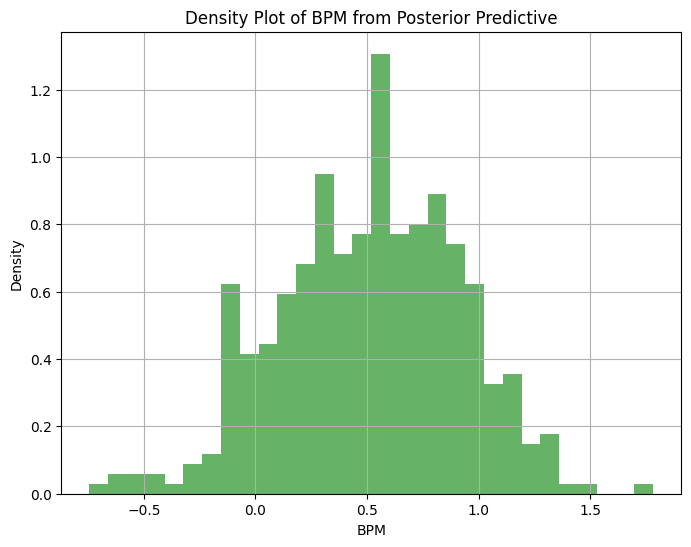

In [ ]:
# Extract BPM data from the posterior_predictive
bpm_data = results.posterior_predictive["BPM"].values

# Flatten the data as it might be multidimensional
bpm_data_flat = bpm_data.flatten()

# Plotting the density using a histogram
plt.figure(figsize=(8, 6))
plt.hist(bpm_data_flat, bins=30, density=True, alpha=0.6, color='g')
plt.title('Density Plot of BPM from Posterior Predictive')
plt.xlabel('BPM')
plt.ylabel('Density')
plt.grid(True)
plt.show()

We can get the confidence interval for the mean with slightly different syntax.

In [ ]:
# Notice here we say kind = "mean"
model.predict(results,kind = "mean",data=nba_new)

# Notice here it is results.posterior.["target_name"]_mean
ci_mean = np.quantile(results.posterior.BPM_mean,[0.025,0.975])
ci_mean

array([0.28678658, 0.60217796])